In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_train = pd.read_csv("politicES_phase_2_train_public.csv", on_bad_lines='skip')
df_test = pd.read_csv("politicES_phase_2_test_codalab.csv", on_bad_lines='skip')

#show the first rows
df_train.head()

#OJO, al final probar con label

,label,gender,profession,ideology_binary,ideology_multiclass,tweet
0,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,¡Feliz 28 de febrero a todas las andaluzas y a...
1,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,"Feliz año nuevo, feliz esperanza 💕. Querido 20..."
2,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,🇩🇪🇪🇸 ¡Un placer encontrarme con mi homólogo al...
3,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,El conflicto en Ucrania ha supuesto una dramát...
4,0008c4fab9e97623a60380ee9c88cb20,female,politician,left,left,La Academia de la Llingua Asturiana realiza un...


In [16]:
df_train.drop('label', axis=1, inplace=True)
df_test.drop('label', axis=1, inplace=True)

In [17]:
print('Tamaño de test:',round(len(df_test)/len(df_train)*100, 2), '%')

Tamaño de test: 24.31 %


In [18]:
genero_train = df_train['gender'].value_counts().to_dict()
genero_test = df_test['gender'].value_counts().to_dict()

profesion_train = df_train['profession'].value_counts().to_dict()
profesion_test = df_test['profession'].value_counts().to_dict()

ideologia_bin_train = df_train['ideology_binary'].value_counts().to_dict()
ideologia_bin_test = df_test['ideology_binary'].value_counts().to_dict()

ideology_train = df_train['ideology_multiclass'].value_counts().to_dict()
ideology_test = df_test['ideology_multiclass'].value_counts().to_dict()

LABELS1=genero_train.keys()
LABELS2=profesion_train.keys()
LABELS3=ideologia_bin_train.keys()
LABELS4=ideology_train.keys()

Text(0, 0.5, 'Número de Instancias')

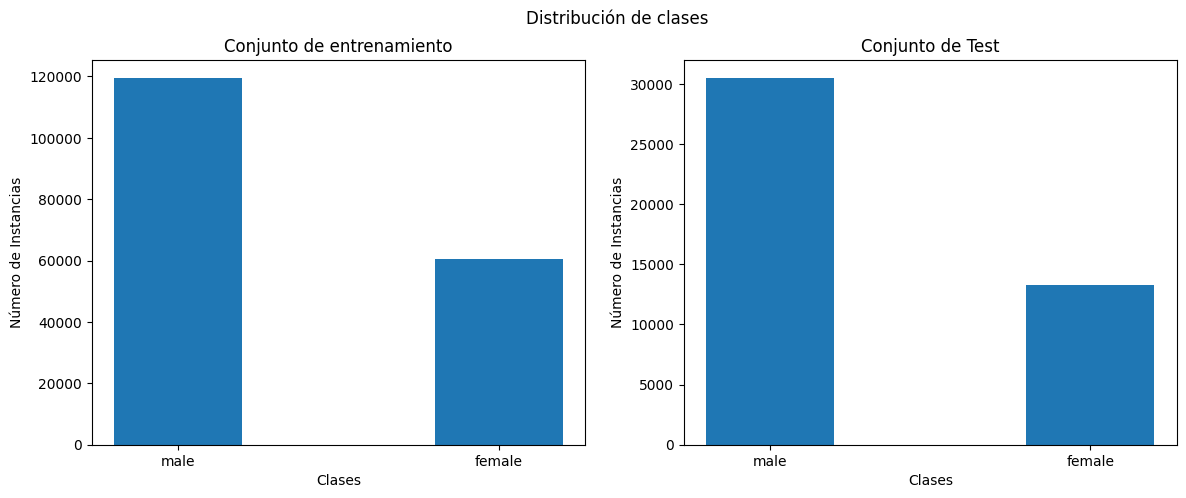

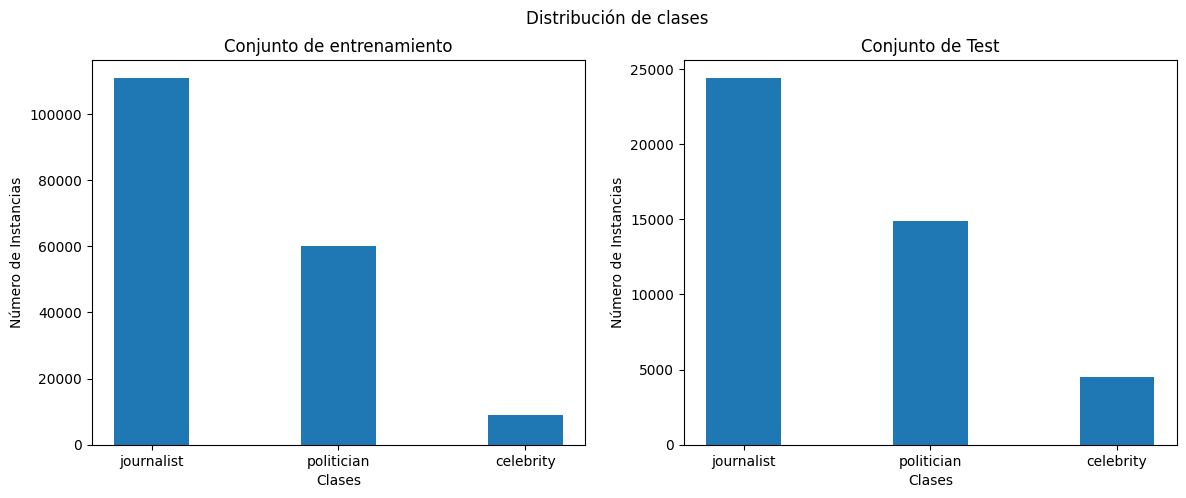

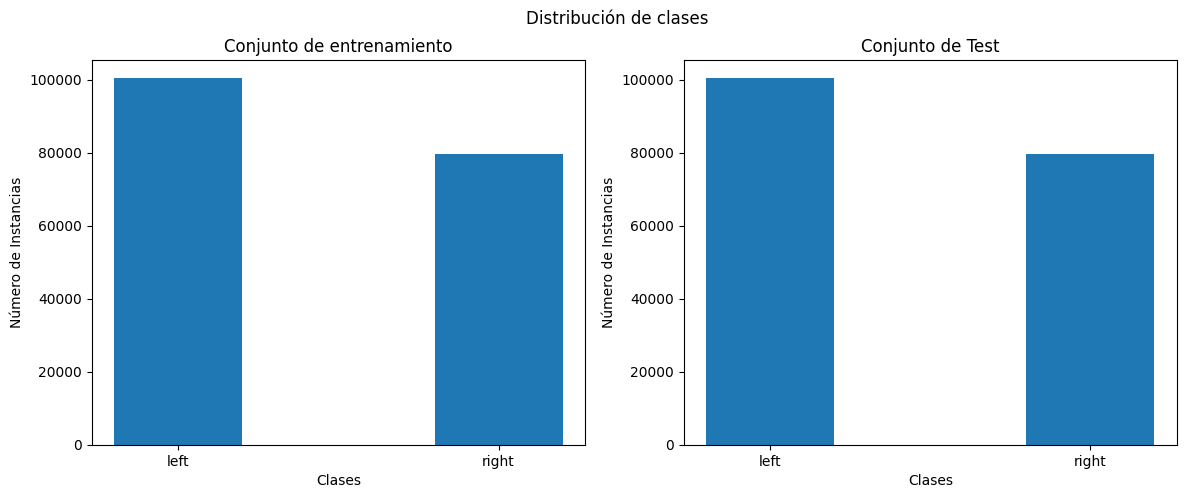

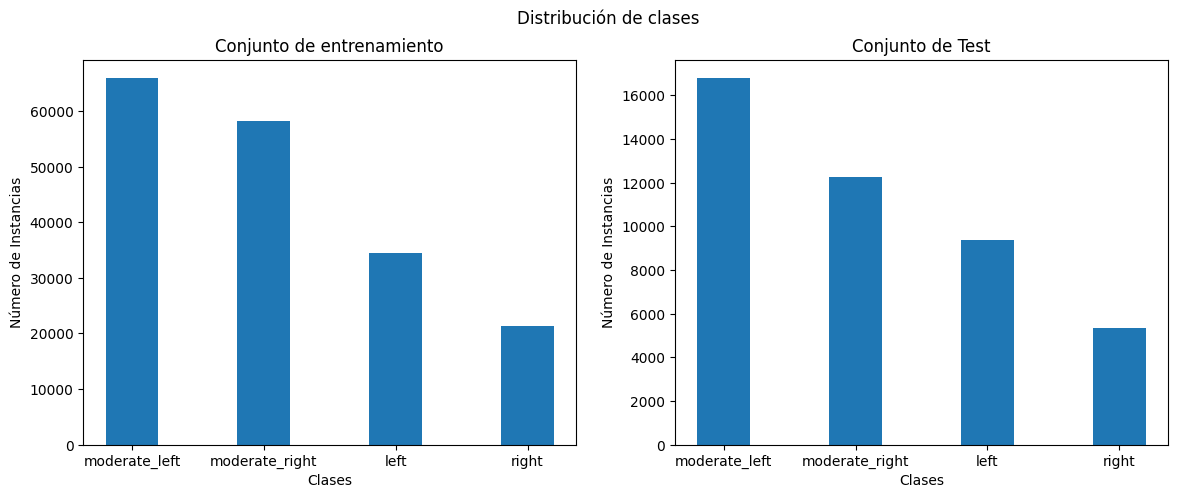

In [19]:
fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distribución de clases')
ax_train.bar(LABELS1, genero_train.values(), width=0.4)
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xlabel('Clases')
ax_train.set_ylabel('Número de Instancias')

ax_test.bar(LABELS1, genero_test.values(), width=0.4)
ax_test.set_title('Conjunto de Test')
ax_test.set_xlabel('Clases')
ax_test.set_ylabel('Número de Instancias')

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distribución de clases')
ax_train.bar(LABELS2, profesion_train.values(), width=0.4)
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xlabel('Clases')
ax_train.set_ylabel('Número de Instancias')

ax_test.bar(LABELS2, profesion_test.values(), width=0.4)
ax_test.set_title('Conjunto de Test')
ax_test.set_xlabel('Clases')
ax_test.set_ylabel('Número de Instancias')

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distribución de clases')
ax_train.bar(LABELS3, ideologia_bin_train.values(), width=0.4)
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xlabel('Clases')
ax_train.set_ylabel('Número de Instancias')

ax_test.bar(LABELS3, ideologia_bin_train.values(), width=0.4)
ax_test.set_title('Conjunto de Test')
ax_test.set_xlabel('Clases')
ax_test.set_ylabel('Número de Instancias')

fig, (ax_train, ax_test) = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Distribución de clases')
ax_train.bar(LABELS4, ideology_train.values(), width=0.4)
ax_train.set_title('Conjunto de entrenamiento')
ax_train.set_xlabel('Clases')
ax_train.set_ylabel('Número de Instancias')

ax_test.bar(LABELS4, ideology_test.values(), width=0.4)
ax_test.set_title('Conjunto de Test')
ax_test.set_xlabel('Clases')
ax_test.set_ylabel('Número de Instancias')
     

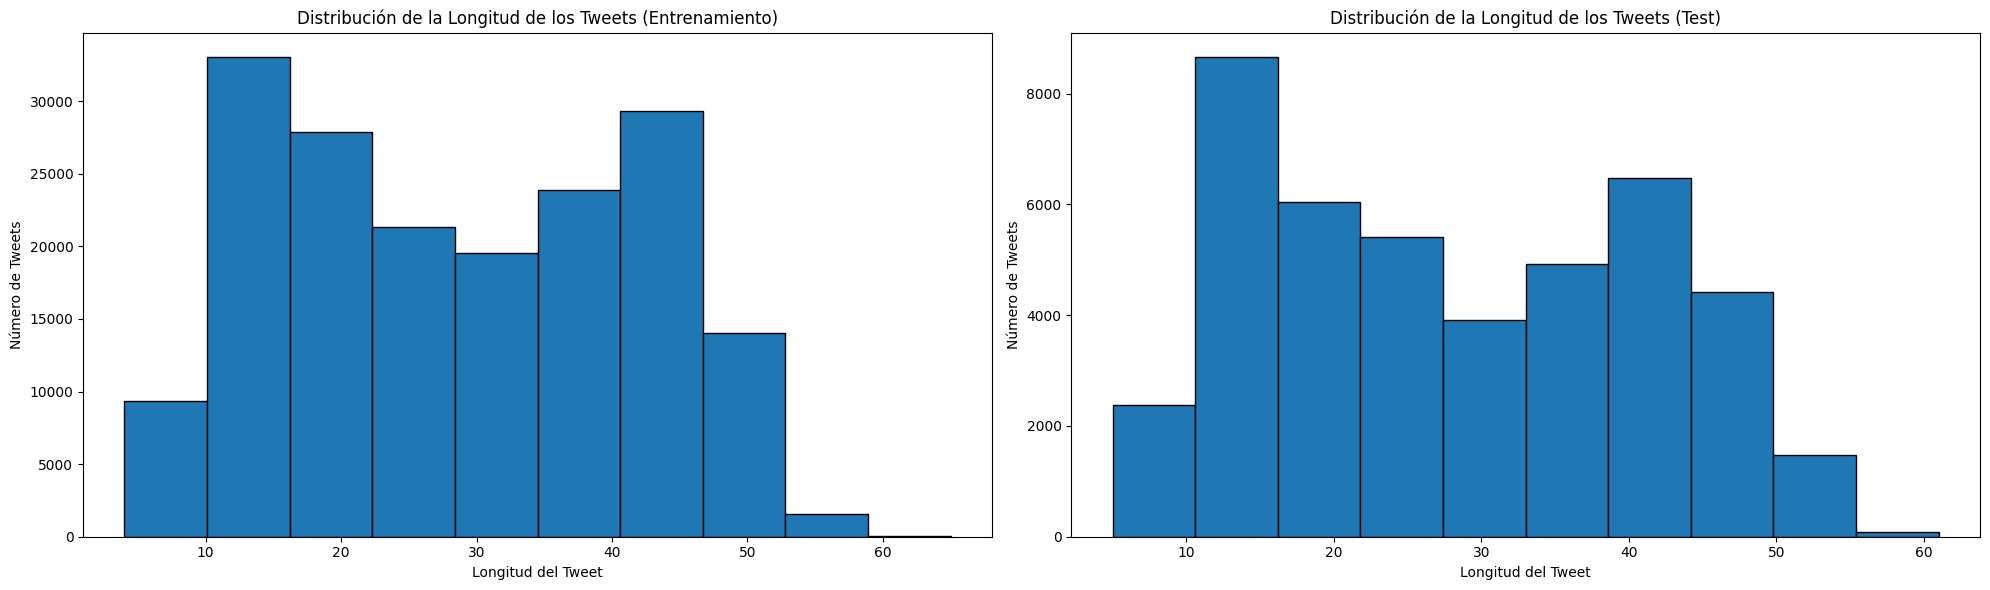

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(20,6)) 

# Gráfica para train_data
axes[0].hist(df_train['tweet'].apply(lambda text: len(text.split())), bins=10, edgecolor='black')
axes[0].set_title('Distribución de la Longitud de los Tweets (Entrenamiento)')
axes[0].set_xlabel('Longitud del Tweet')
axes[0].set_ylabel('Número de Tweets')

# Gráfica para test_data
axes[1].hist(df_test['tweet'].apply(lambda text: len(text.split())), bins=10, edgecolor='black')
axes[1].set_title('Distribución de la Longitud de los Tweets (Test)')
axes[1].set_xlabel('Longitud del Tweet')
axes[1].set_ylabel('Número de Tweets')

plt.tight_layout()
plt.show()

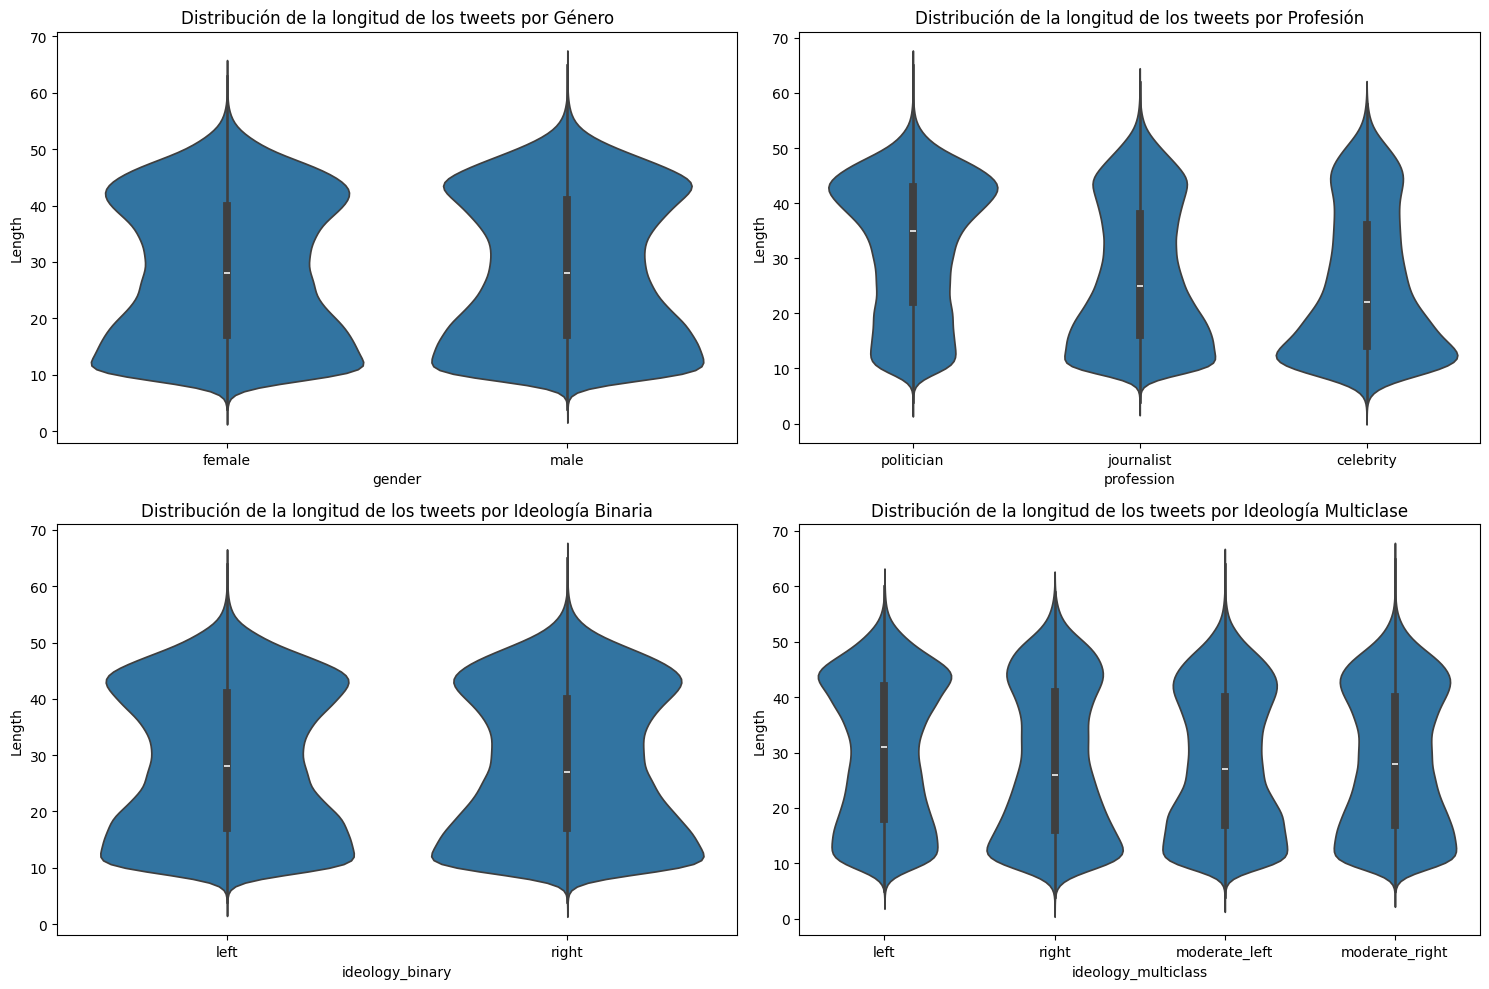

In [21]:
df_train['Length'] = df_train['tweet'].apply(lambda text: len(text.split()))

fig, axs = plt.subplots(2, 2, figsize=(15, 10)) 

sns.violinplot(x='gender', y='Length', data=df_train, ax=axs[0, 0])
axs[0, 0].set_title('Distribución de la longitud de los tweets por Género')

sns.violinplot(x='profession', y='Length', data=df_train, ax=axs[0, 1])
axs[0, 1].set_title('Distribución de la longitud de los tweets por Profesión')

sns.violinplot(x='ideology_binary', y='Length', data=df_train, ax=axs[1, 0])
axs[1, 0].set_title('Distribución de la longitud de los tweets por Ideología Binaria')

sns.violinplot(x='ideology_multiclass', y='Length', data=df_train, ax=axs[1, 1])
axs[1, 1].set_title('Distribución de la longitud de los tweets por Ideología Multiclase')

plt.tight_layout()
plt.show()


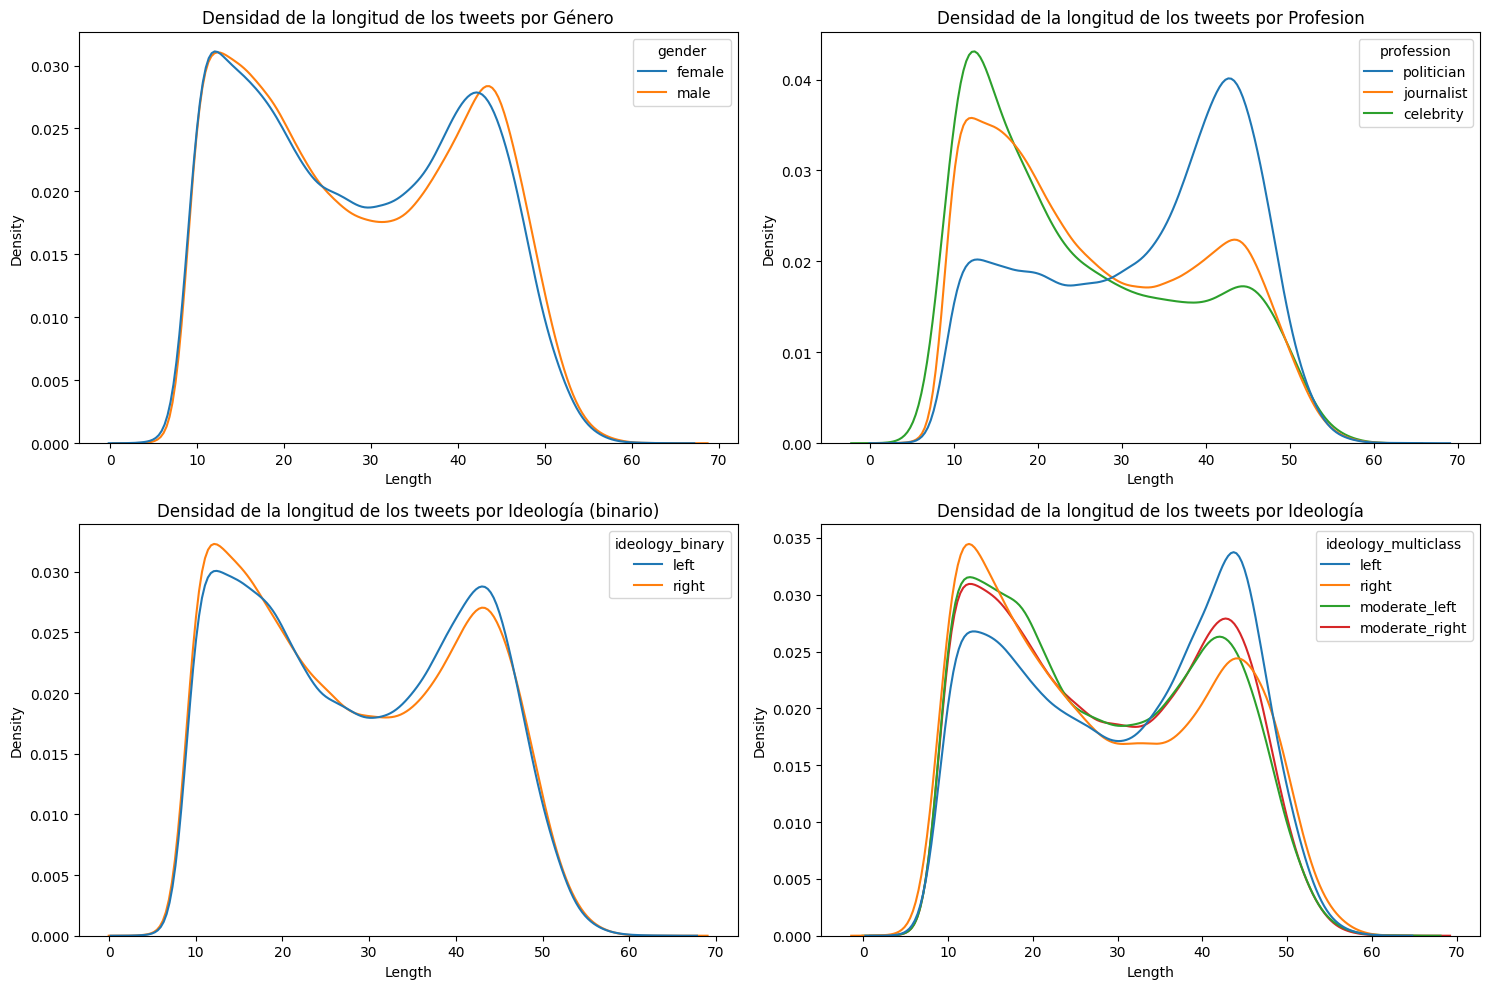

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10)) 

sns.kdeplot(data=df_train, x='Length', hue='gender', common_norm=False, ax=axs[0, 0])
axs[0, 0].set_title('Densidad de la longitud de los tweets por Género')

sns.kdeplot(data=df_train, x='Length', hue='profession', common_norm=False, ax=axs[0, 1])
axs[0, 1].set_title('Densidad de la longitud de los tweets por Profesion')

sns.kdeplot(data=df_train, x='Length', hue='ideology_binary', common_norm=False, ax=axs[1, 0])
axs[1, 0].set_title('Densidad de la longitud de los tweets por Ideología (binario)')

sns.kdeplot(data=df_train, x='Length', hue='ideology_multiclass', common_norm=False, ax=axs[1, 1])
axs[1, 1].set_title('Densidad de la longitud de los tweets por Ideología')

plt.tight_layout()
plt.show()


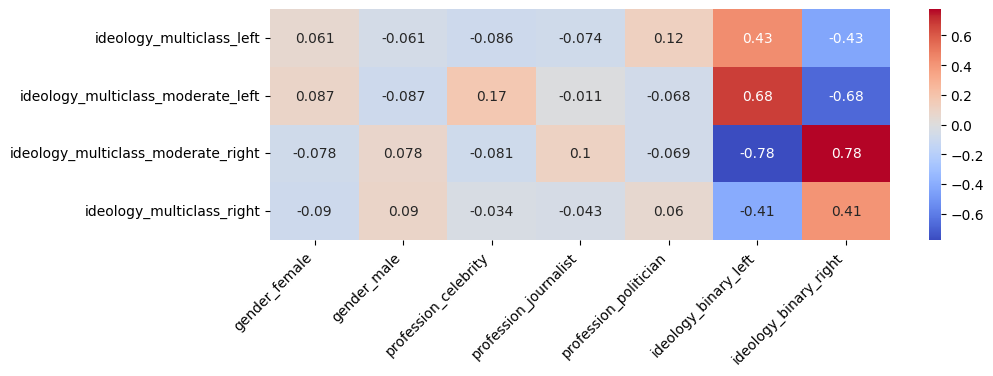

In [23]:
# Seleccionamos solo las columnas de interés para la correlación
columns_of_interest = ['gender', 'profession', 'ideology_binary', 'ideology_multiclass']

data_for_correlation = df_train[columns_of_interest]
data_dummies = pd.get_dummies(data_for_correlation, prefix=None)

correlation_matrix = data_dummies.corr()

correlations_with_ideology_multiclass = correlation_matrix.filter(regex='ideology_multiclass').drop(
    data_dummies.filter(regex='ideology_multiclass').columns, axis=0)

plt.figure(figsize=(10, 3))  # Ajusta el tamaño de la figura según sea necesario
sns.heatmap(correlations_with_ideology_multiclass.T, annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()